In [17]:
# batch : 전체 데이터를 한꺼번에 학습시키는 방법. 일괄처리
# mini batch : 전체 데이터를 mini batch 단위로 나누어서 학습시키는 방법 → 메모리 절약
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)

In [18]:
from sklearn.cluster import KMeans

# 기본모형
model1 = KMeans(n_clusters=3).fit(X)

In [19]:
# 미니배치를 적용한 모형
# 데이터를 미니배치 크기만큼 무작위로 분리하여 처리
from sklearn.cluster import MiniBatchKMeans

model2 = MiniBatchKMeans(n_clusters=3, batch_size=1536).fit(X)
#                        클러스터       미니배치 사이즈

In [20]:
from sklearn.metrics.cluster import silhouette_score

silhouette_score(X[:10000], model1.predict(X[:10000]))
# silhouette_score(X, model1.predict(X))  # 전체데이터 → 작업시간이 오래걸림림

0.6487004457360496

In [21]:
from sklearn.metrics.cluster import silhouette_score

silhouette_score(X[:10000], model2.predict(X[:10000]))
# silhouette_score(X, model2.predict(X))  # 전체데이터 → 작업시간이 오래걸림림

0.6486039397415749

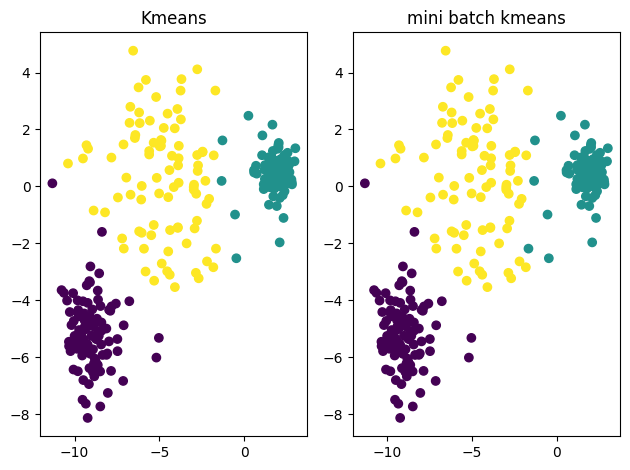

In [22]:
import matplotlib.pyplot as plt
import numpy as np

idx = np.random.randint(150000, size=300)
plt.subplot(121)
plt.scatter(X[idx, 0], X[idx, 1], c=model1.labels_[idx])
plt.title("Kmeans")
plt.subplot(122)
plt.scatter(X[idx, 0], X[idx, 1], c=model2.labels_[idx])
plt.title("mini batch kmeans")
plt.tight_layout()

plt.show()
# 결과는 큰 차이가 없음